In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt

In [2]:
import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [3]:
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')
df = pd.read_csv("data.csv", parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse) 
df.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [4]:
df.shape

(5094, 5)

In [6]:
df.Unit.value_counts()  

Million Metric Tons of Carbon Dioxide    5094
Name: Unit, dtype: int64

In [7]:
df.Description.value_counts()  

Coal Electric Power Sector CO2 Emissions                                                      566
Natural Gas Electric Power Sector CO2 Emissions                                               566
Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions    566
Petroleum Coke Electric Power Sector CO2 Emissions                                            566
Residual Fuel Oil Electric Power Sector CO2 Emissions                                         566
Petroleum Electric Power Sector CO2 Emissions                                                 566
Geothermal Energy Electric Power Sector CO2 Emissions                                         566
Non-Biomass Waste Electric Power Sector CO2 Emissions                                         566
Total Energy Electric Power Sector CO2 Emissions                                              566
Name: Description, dtype: int64

In [5]:
    

df.MSN.value_counts()  

CLEIEUS    566
NNEIEUS    566
DKEIEUS    566
PCEIEUS    566
RFEIEUS    566
PAEIEUS    566
GEEIEUS    566
NWEIEUS    566
TXEIEUS    566
Name: MSN, dtype: int64

In [38]:
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head(15)

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-06-01,CLEIEUS,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-07-01,CLEIEUS,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-08-01,CLEIEUS,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-09-01,CLEIEUS,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [39]:
ts.dtypes

MSN             object
Value           object
Column_Order     int64
Description     object
Unit            object
dtype: object

In [40]:
# Let us first convert the emision value into numeric value as follows
ts['Value'] = pd.to_numeric(ts['Value'] , errors='coerce')
ts.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [41]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4707 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
MSN             4707 non-null object
Value           4323 non-null float64
Column_Order    4707 non-null int64
Description     4707 non-null object
Unit            4707 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 220.6+ KB


In [43]:
ts.dropna(inplace = True)

In [44]:
#group by products same products changing date(month)
Energy_sources = ts.groupby('Description')
Energy_sources.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-01-01,NNEIEUS,12.175,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,NNEIEUS,11.708,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,NNEIEUS,13.994,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,NNEIEUS,14.627,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


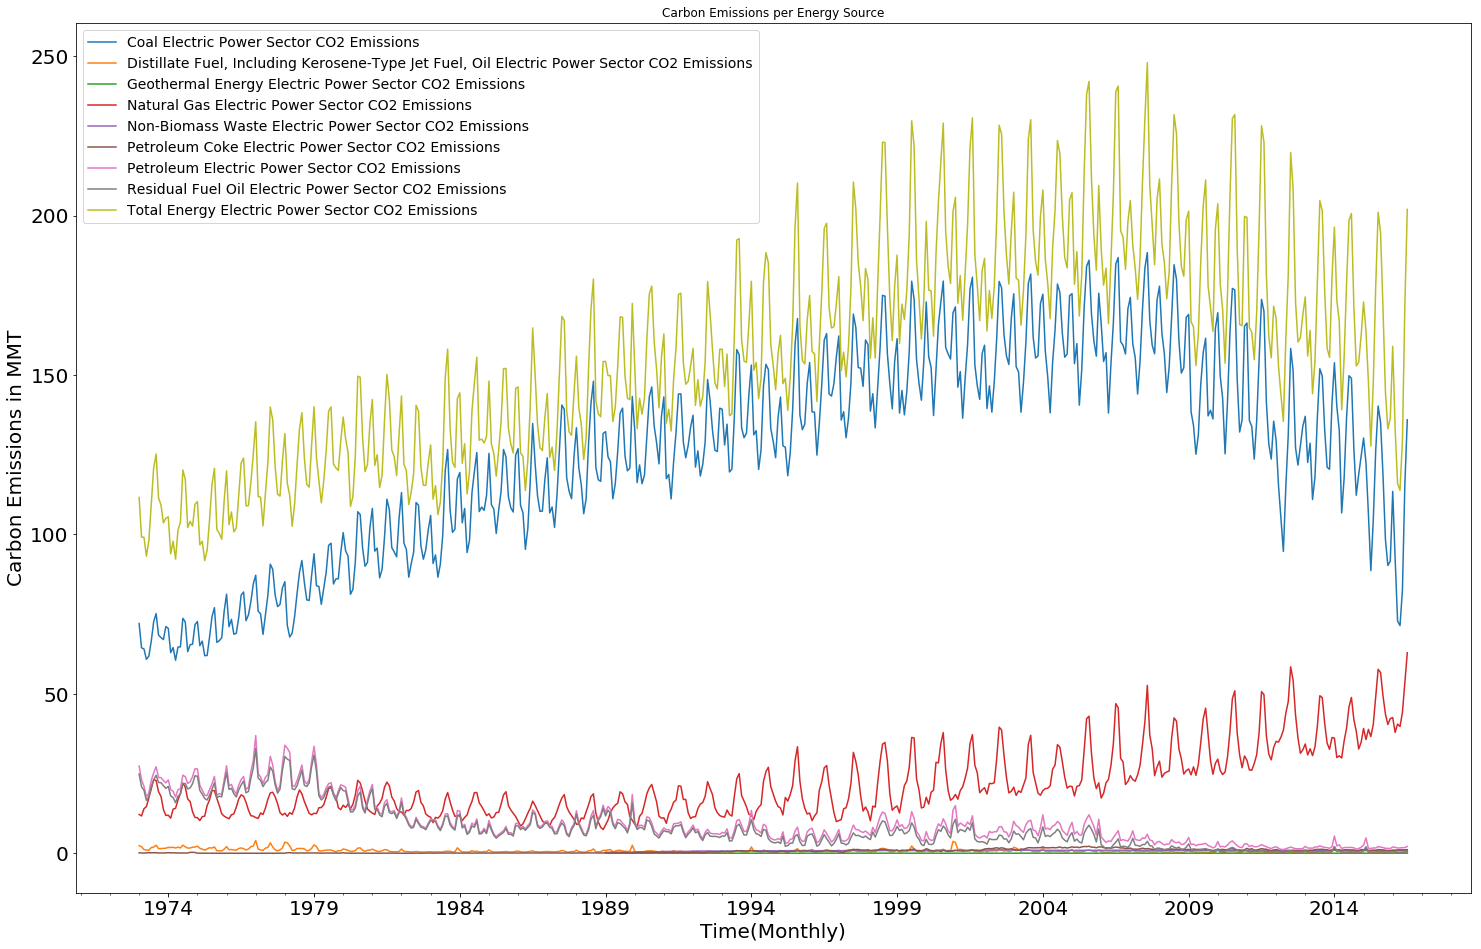

In [48]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 25, 16
fig, ax = plt.subplots()
for desc, group in Energy_sources:
    group.plot(x = group.index, y='Value', label=desc,ax = ax, title='CO2 Emissions per Energy Source', fontsize = 20)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('CO2 Emissions in MMT')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.legend(fontsize = 14)

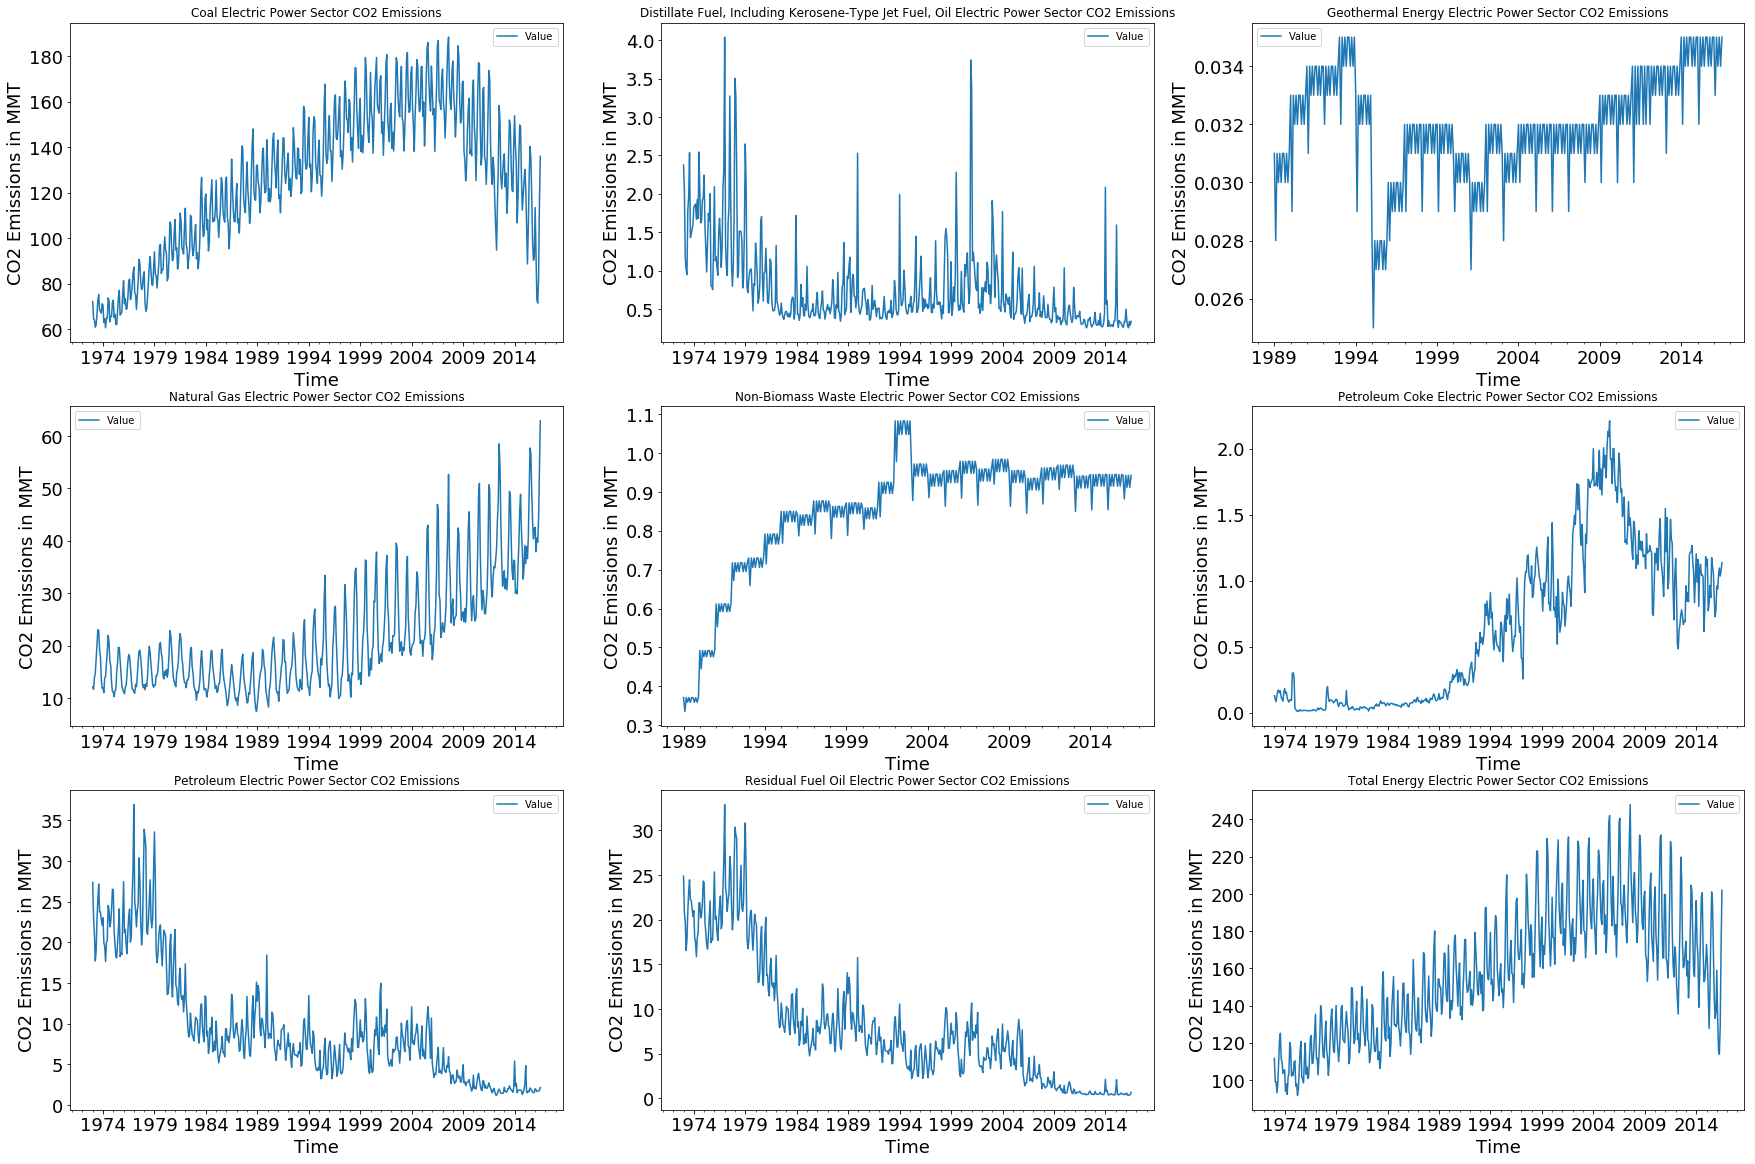

In [49]:
fig, axes = plt.subplots(3,3, figsize = (30, 20))
for (desc, group), ax in zip(Energy_sources, axes.flatten()):
    group.plot(x = group.index, y='Value',ax = ax, title=desc, fontsize = 18)
    ax.set_xlabel('Time')
    ax.set_ylabel('CO2 Emissions in MMT')
    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)